In [2]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras
import os


Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Deep Learning/Parrot Classification/Images'

## **Data Augmentation**

In [4]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,         # normalization
    rotation_range = 20,      # rotation
    zoom_range = 0.2,         # zoom in/ zoom out
    horizontal_flip = True,
    validation_split = 0.2
)

train_gen = train_datagen.flow_from_directory(
    path,
    target_size = (img_size, img_size),
    batch_size= batch_size,
    class_mode = "categorical",
    subset = "training"
)

val_gen = train_datagen.flow_from_directory(
    path,
    target_size = (img_size, img_size),
    batch_size= batch_size,
    class_mode = "categorical",
    subset = "validation"
)

num_classes = train_gen.num_classes
print("classes : ", train_gen.class_indices)

Found 128 images belonging to 4 classes.
Found 31 images belonging to 4 classes.
classes :  {'amazon green parrot': 0, 'gray parrot': 1, 'macaw': 2, 'white parrot': 3}


## **Building a Model**

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.25),
    Dense(num_classes, activation = 'softmax')
])

model.compile(
    optimizer = Adam(0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,700 (84.86 MB)

 Trainable params: 22,245,700 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

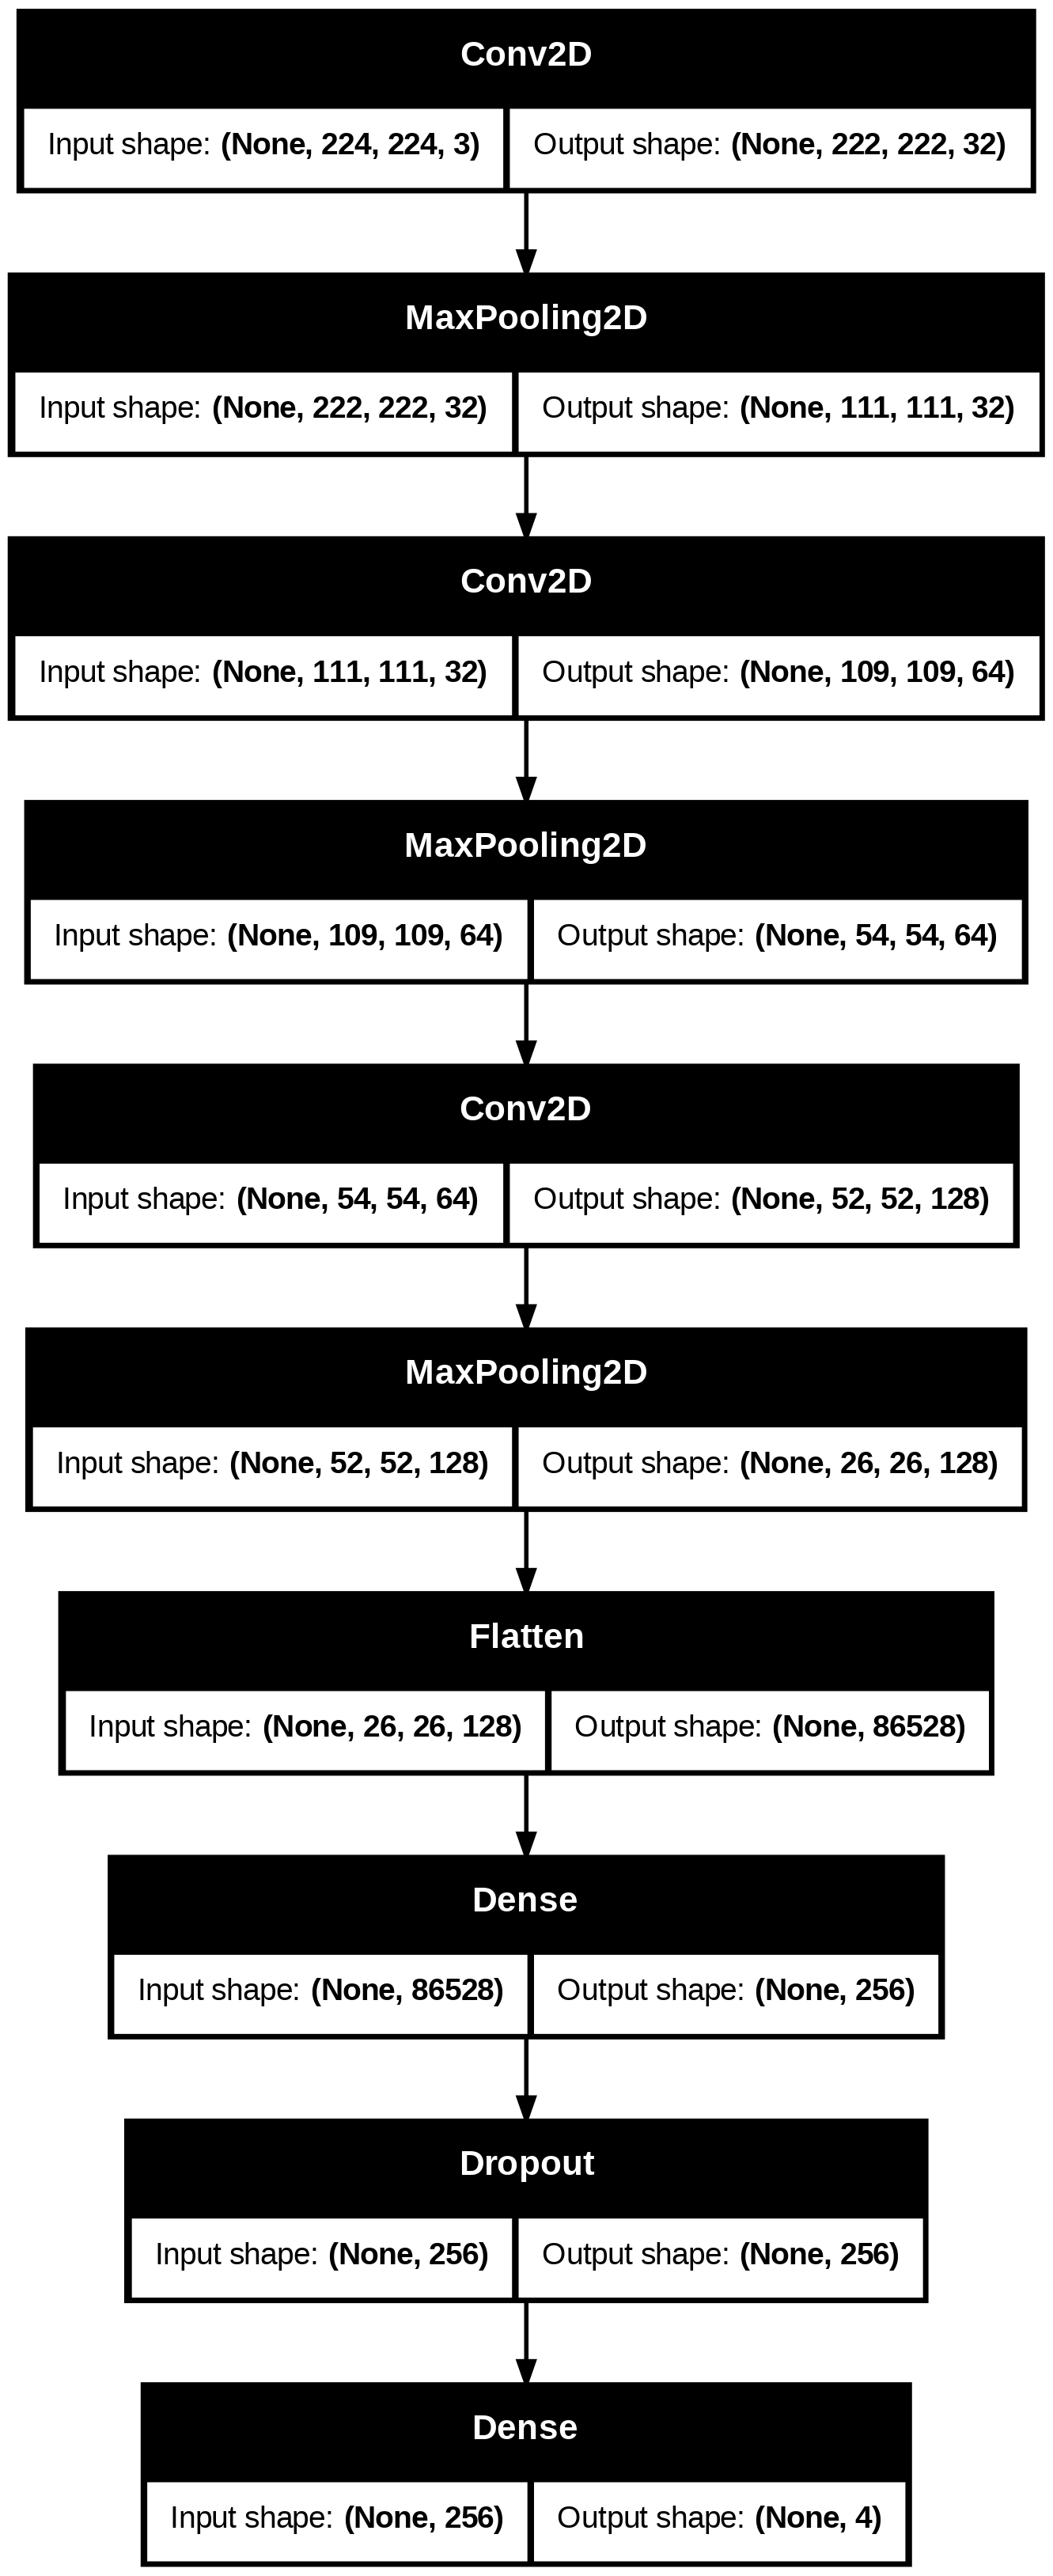

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
history = model.fit(
    train_gen,
    epochs = 30,
    validation_data = val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.3156 - loss: 1.4177 - val_accuracy: 0.1935 - val_loss: 1.5531
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 726ms/step - accuracy: 0.1625 - loss: 1.4498 - val_accuracy: 0.3226 - val_loss: 1.2844
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 783ms/step - accuracy: 0.3438 - loss: 1.2929 - val_accuracy: 0.3226 - val_loss: 1.2855
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 921ms/step - accuracy: 0.3656 - loss: 1.2874 - val_accuracy: 0.2903 - val_loss: 1.2819
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 683ms/step - accuracy: 0.4031 - loss: 1.2142 - val_accuracy: 0.2258 - val_loss: 1.2697
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 686ms/step - accuracy: 0.4708 - loss: 1.1594 - val_accuracy: 0.3226 - val_loss: 1.2836
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - accuracy: 0.5396 - loss: 1.0856 - val_accuracy: 0.2903 - val_loss: 1.2480
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 926ms/step - accuracy: 0.6302 - loss: 0.9629 - val_accuracy: 0.3226 - val_loss: 1

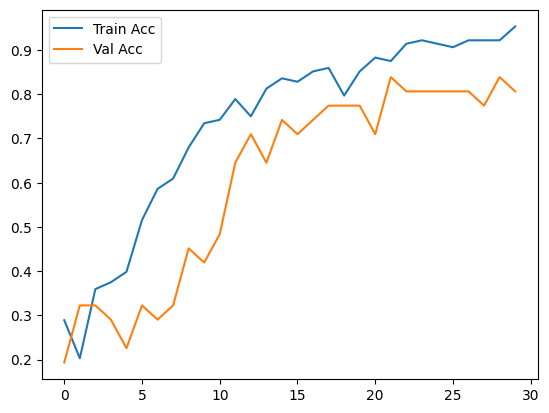

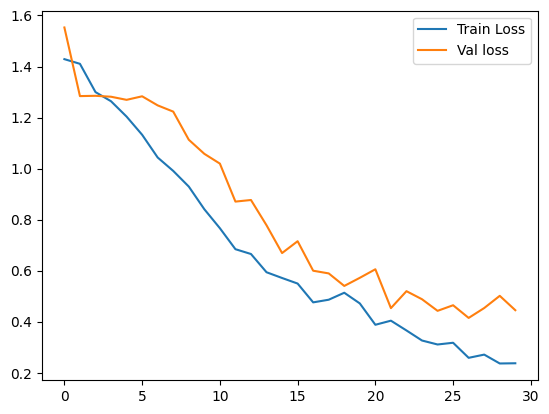

In [8]:
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val loss')
plt.legend()
plt.show()

## **Predictions**

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
def plot_predections(model, folder_path, num_images):
  img_paths = []

  # collect only image files
  for file in os.listdir(folder_path):
    if file.lower().endswith(".jpg"):
      img_paths.append(os.path.join(folder_path, file))

  img_paths = img_paths[:num_images]

  plt.figure(figsize = (12,8))

  class_names = list(train_gen.class_indices.keys())

  for i, img_path in enumerate(img_paths):
    img = image.load_img(img_path, target_size = (img_size, img_size))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis = 0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.subplot(2, 3, i+1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {class_names[class_index]}\nConfidence: {confidence:.2f}")
    plt.axis("off")

  plt.tight_layout()
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


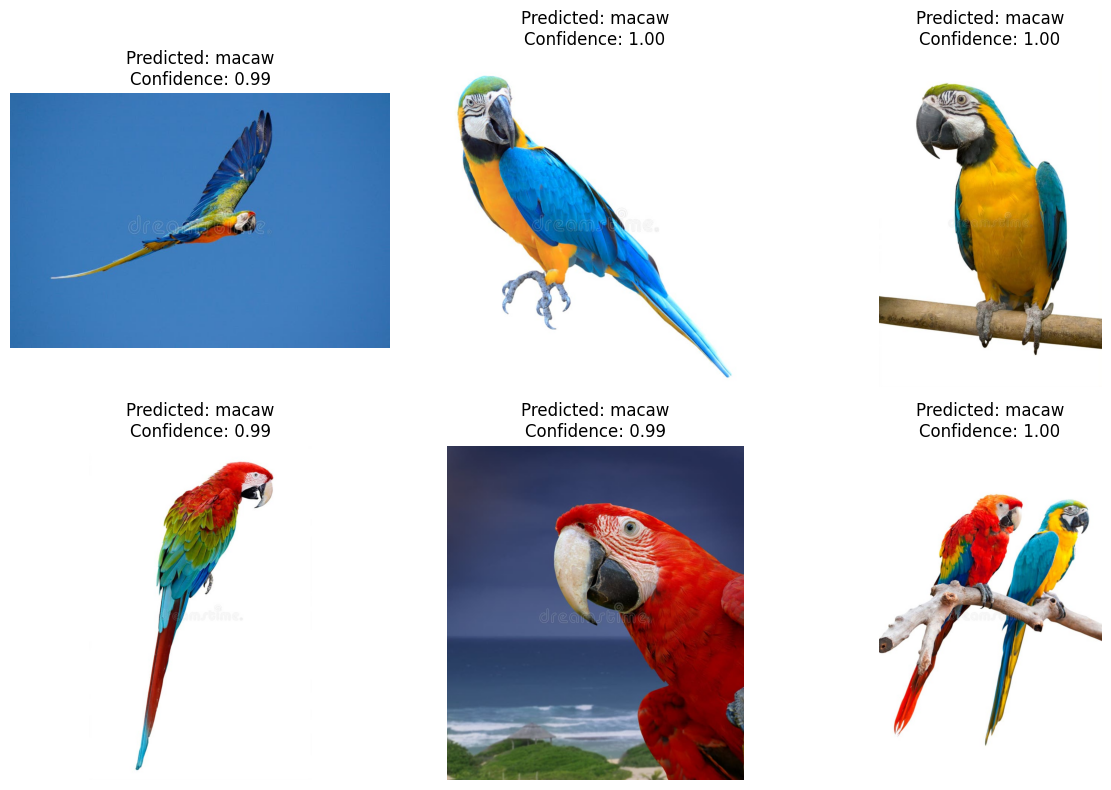

In [10]:
plot_predections(model, "/content/drive/MyDrive/Deep Learning/Parrot Classification/Images/macaw", num_images = 6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


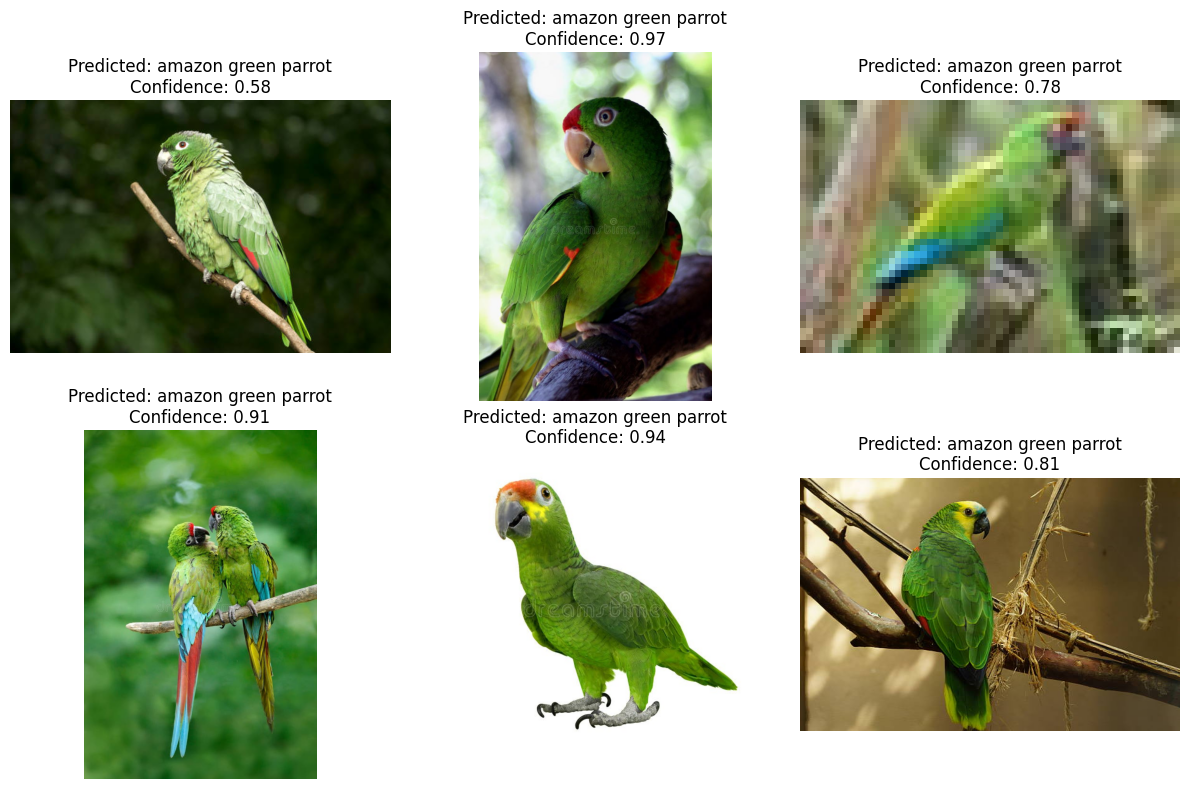

In [11]:
plot_predections(model, "/content/drive/MyDrive/Deep Learning/Parrot Classification/Images/amazon green parrot", num_images = 6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


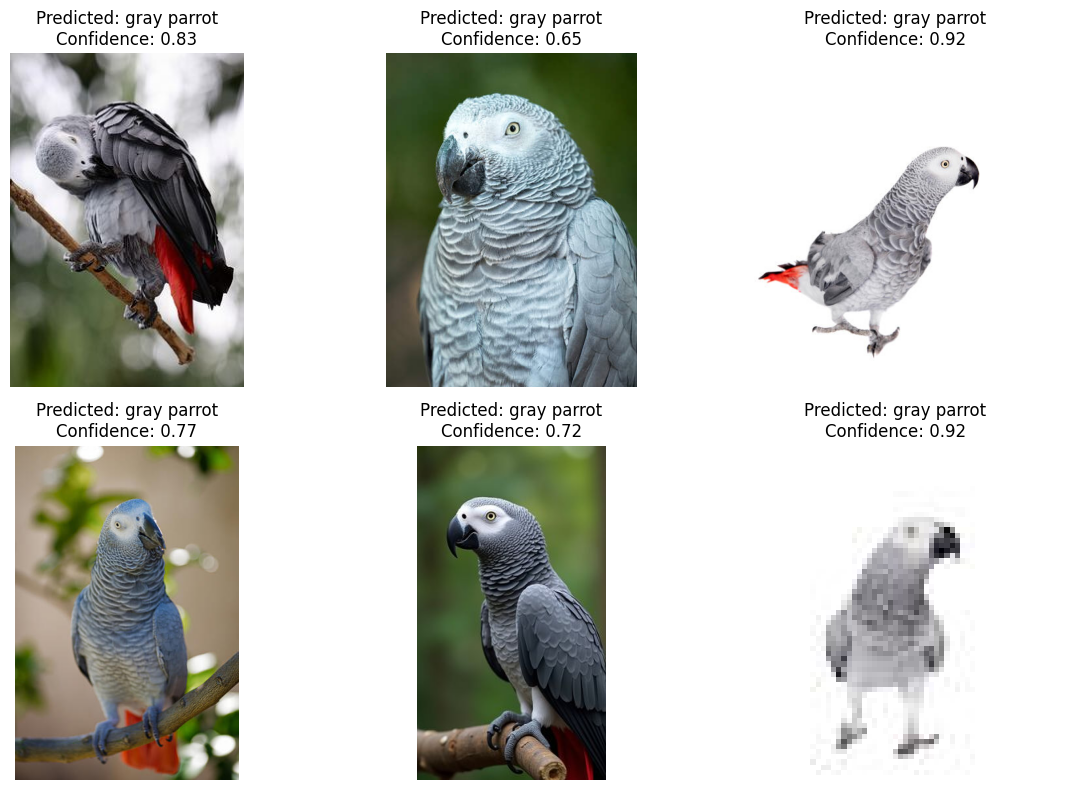

In [12]:
plot_predections(model, "/content/drive/MyDrive/Deep Learning/Parrot Classification/Images/gray parrot", num_images = 6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


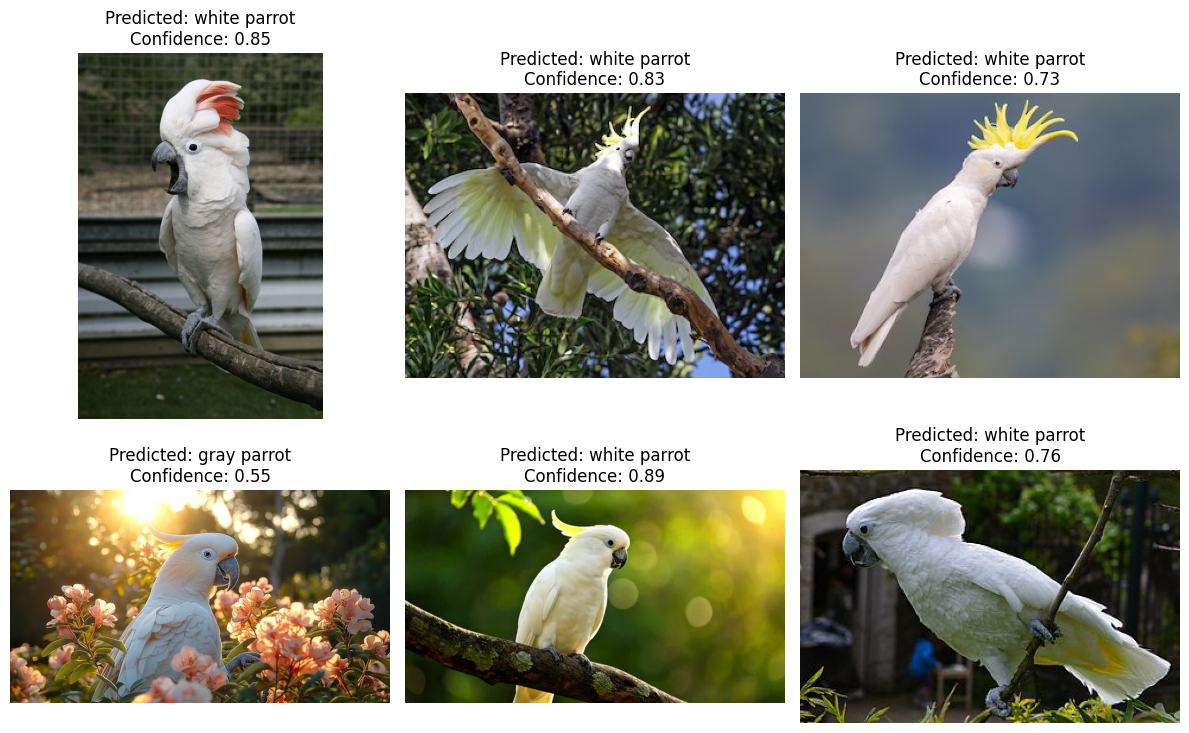

In [13]:
plot_predections(model, "/content/drive/MyDrive/Deep Learning/Parrot Classification/Images/white parrot", num_images = 6)

In [14]:
model.save("/content/drive/MyDrive/Deep Learning/Parrot Classification/parrot.h5")

## **GUI**

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
model = load_model("parrot.h5")

class_names = ['amazon green parrot', 'gray parrot', 'macaw', 'white parrot']
# class_labels = {0 :'amazon green parrot', 1 :'gray parrot', 2 :'macaw', 3 :'white parrot'}

In [4]:
img_size = 224
def predict_image(img_path):
  img = image.load_img(img_path, target_size = (img_size, img_size))
  img_arr = image.img_to_array(img)/255.0
  img_arr = np.expand_dims(img_arr, axis = 0)

  pred = model.predict(img_arr)
  class_index = np.argmax(pred)
  confidence = np.max(pred)

  return class_names[class_index], confidence

In [5]:
def open_image():
  global panel

  file_path = filedialog.askopenfilename(
      filetypes=[("Image files", "*.jpg;*.jpeg;*.png")]
  )

  if not file_path:
    return

  # Load and display image
  img = Image.open(file_path)
  img = img.resize((250,250))
  img_tk = ImageTk.PhotoImage(img)


  panel.configure(image = img_tk)
  panel.image = img_tk

  # Predict
  label, conf = predict_image(file_path)
  result_label.config(
      text = f"Prediction: {label}\nConfidence: {conf:.2f}"
  )

In [ ]:

root = tk.Tk()
root.title("Parrot Species Classifier (CNN Model)")
root.geometry("400x450")
root.configure(bg = "#E8F1F5")

title_label = tk.Label(root, text = "Parrot Classification", font = ("Arial", 18, "bold"), bg = "#E8F1F5")
title_label.pack(pady = 10)

panel = tk.Label(root)
panel.pack(pady = 10)

btn = tk.Button(root, text = "Upload Parrot Image", command = open_image, font = ("Arial", 14), bg = "#5DADE2", fg = "white")
btn.pack(pady = 10)

result_label = tk.Label(root, text = "", font = ("Arial", 14), bg = "#E8F1F5")
result_label.pack(pady = 20)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
